In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
heartDf = pd.read_csv('./heart.csv')
heartDf.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
renamedHeartDf = heartDf.rename(columns={
  "cp": "chestPain", 
  "trtbps": "restingBloodPressure",
  "chol": "cholesterol",
  "fbs": "fastingBloodSugar",
  "restecg": "restEcg",
  "thalachh": "maxHeartRateAchieved",
  "exng": "exerciceInducedAngina",
  "oldpeak": "stDepression",
  "slp": "stSegmentSlope",
  "caa": "majorVesselsNum",
  "thall": "thalassemia",
  "output": "heartDisease"
})
renamedHeartDf.head()

,age,sex,chestPain,restingBloodPressure,cholesterol,fastingBloodSugar,restEcg,maxHeartRateAchieved,exerciceInducedAngina,stDepression,stSegmentSlope,majorVesselsNum,thalassemia,heartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# 0.00 a 0.19 - correlação bem fraca
# 0.20 a 0.39 - correlação fraca
# 0.40 a 0.69 - correlação moderada
# 0.70 a 0.89 - correlação forte
corr = renamedHeartDf.corr()
corr[['heartDisease']]

,heartDisease
age,-0.225439
sex,-0.280937
chestPain,0.433798
restingBloodPressure,-0.144931
cholesterol,-0.085239
fastingBloodSugar,-0.028046
restEcg,0.137230
maxHeartRateAchieved,0.421741
exerciceInducedAngina,-0.436757
stDepression,-0.430696


In [8]:
moderateCorr = corr.heartDisease[(corr.heartDisease.abs() > 0.4) & (corr.heartDisease.abs() < 1)]
moderateCorr

chestPain                0.433798
maxHeartRateAchieved     0.421741
exerciceInducedAngina   -0.436757
stDepression            -0.430696
Name: heartDisease, dtype: float64

In [10]:
Xs = moderateCorr.index
Xs

Index(['chestPain', 'maxHeartRateAchieved', 'exerciceInducedAngina',
       'stDepression'],
      dtype='object')

In [11]:
y = renamedHeartDf[['heartDisease']]

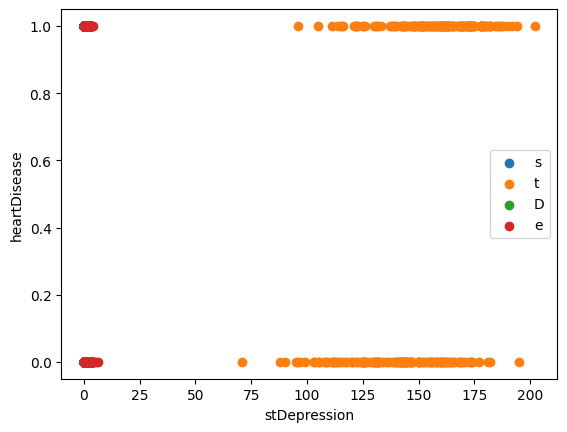

In [15]:
for x in Xs:
  plt.scatter(renamedHeartDf[[x]], y)
  plt.xlabel(x)
  plt.legend(x)
  plt.ylabel('heartDisease')

plt.show()  